##Scrapping Google Apps Review - eg Mobile JKN
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [ ]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 939.2 kB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
#Android App Mobile JKN  from Google Play at
#https://play.google.com/store/apps/details?id=app.bpjs.mobile&hl=id
#The apps ID found in the link after id=app.bpjs.mobile&hl=id
#The apps name on Google Play titled: MobileJKN dari Pemerintah Indonesia (Kemenkes)
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

fitbit_reviews = reviews_all(
    'com.fitbit.FitbitMobile',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
#Save Mobile JKN reviews into dataframe
df_fitrev = pd.DataFrame(np.array(fitbit_reviews),columns=['content'])
df_fitrev = df_fitrev.join(pd.DataFrame(df_fitrev.pop('content').tolist()))
df_fitrev.to_csv(r'df_fitrev', index=False)

In [ ]:
df_fitrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,63e023b1-cdd4-44a1-8fbe-5b877840311f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Love the app, but just recently I don't get a ...",4,0,None,2025-03-05 06:47:15,"Hi, Lisa. We're sorry to hear this and for doi...",2025-03-05 07:15:49,None
1,b1345ccc-5259-4409-b1ed-03208db99cd7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Well, it finally happened to me. My charge 5 h...",1,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 06:23:59,"Hi, J Kay. We're sorry to hear this. Try these...",2025-03-05 06:26:49,4.37.fitbit-mobile-110222988-728765411
2,3d316fc4-c8e4-47af-b539-17acbc6be17c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,My steps are keep resetting to the lower numbe...,3,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 04:27:31,"Hi, Allya. Please try the following steps: log...",2025-03-05 05:00:14,4.37.fitbit-mobile-110222988-728765411
3,5194a367-8910-4a48-b4b6-63359b8ed6ea,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The app is horrible recently. I use fitbit for...,1,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 04:11:49,"Hi, Akinorev. Sorry to hear this. Thanks for t...",2025-03-05 04:39:34,4.37.fitbit-mobile-110222988-728765411
4,f0a48c73-cc46-4afe-85a2-3df56b01f148,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This is the worst app on my phone. Won't conne...,1,0,None,2025-03-05 04:10:00,"Hi, James. We're sorry to hear this. If you ha...",2024-10-26 14:33:45,None
...,...,...,...,...,...,...,...,...,...,...,...
377492,4f8440ed-5742-49d2-84c2-52c110b2144e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Thanks, this is a must. Lost 11 lbs. so far in...",5,1,None,2012-03-19 04:22:18,None,NaT,None
377493,1088b0a5-bce3-41e7-9d2e-2ab4aa0d48b5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,With more Android devices than iOS out there i...,5,3,1.0,2012-03-18 00:03:55,None,NaT,1.0
377494,02a2a792-860f-4ee9-ab22-8215dbeb7db0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Thank you for doing this.,5,1,1.0,2012-03-17 20:04:01,None,NaT,1.0
377495,39fa8fb2-97eb-459f-bdce-bc501ca06889,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Glad to see it's here! Looks good.,5,1,1.0,2012-03-17 17:01:01,None,NaT,1.0


In [ ]:
df_fitrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377497 entries, 0 to 377496
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              377497 non-null  object        
 1   userName              377497 non-null  object        
 2   userImage             377497 non-null  object        
 3   content               377393 non-null  object        
 4   score                 377497 non-null  int64         
 5   thumbsUpCount         377497 non-null  int64         
 6   reviewCreatedVersion  345624 non-null  object        
 7   at                    377497 non-null  datetime64[ns]
 8   replyContent          53919 non-null   object        
 9   repliedAt             53919 non-null   datetime64[ns]
 10  appVersion            345624 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 31.7+ MB


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_fitrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"Love the app, but just recently I don't get a ...",4,0,None,2025-03-05 06:47:15,"Hi, Lisa. We're sorry to hear this and for doi...",2025-03-05 07:15:49
1,"Well, it finally happened to me. My charge 5 h...",1,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 06:23:59,"Hi, J Kay. We're sorry to hear this. Try these...",2025-03-05 06:26:49
2,My steps are keep resetting to the lower numbe...,3,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 04:27:31,"Hi, Allya. Please try the following steps: log...",2025-03-05 05:00:14
3,The app is horrible recently. I use fitbit for...,1,0,4.37.fitbit-mobile-110222988-728765411,2025-03-05 04:11:49,"Hi, Akinorev. Sorry to hear this. Thanks for t...",2025-03-05 04:39:34
4,This is the worst app on my phone. Won't conne...,1,0,None,2025-03-05 04:10:00,"Hi, James. We're sorry to hear this. If you ha...",2024-10-26 14:33:45
...,...,...,...,...,...,...,...
377492,"Thanks, this is a must. Lost 11 lbs. so far in...",5,1,None,2012-03-19 04:22:18,None,NaT
377493,With more Android devices than iOS out there i...,5,3,1.0,2012-03-18 00:03:55,None,NaT
377494,Thank you for doing this.,5,1,1.0,2012-03-17 20:04:01,None,NaT
377495,Glad to see it's here! Looks good.,5,1,1.0,2012-03-17 17:01:01,None,NaT


In [ ]:
#Check number of reviews scores
df_fitrev['score'].value_counts()

,count
score,
5,141285
1,105534
4,50937
2,40617
3,39124


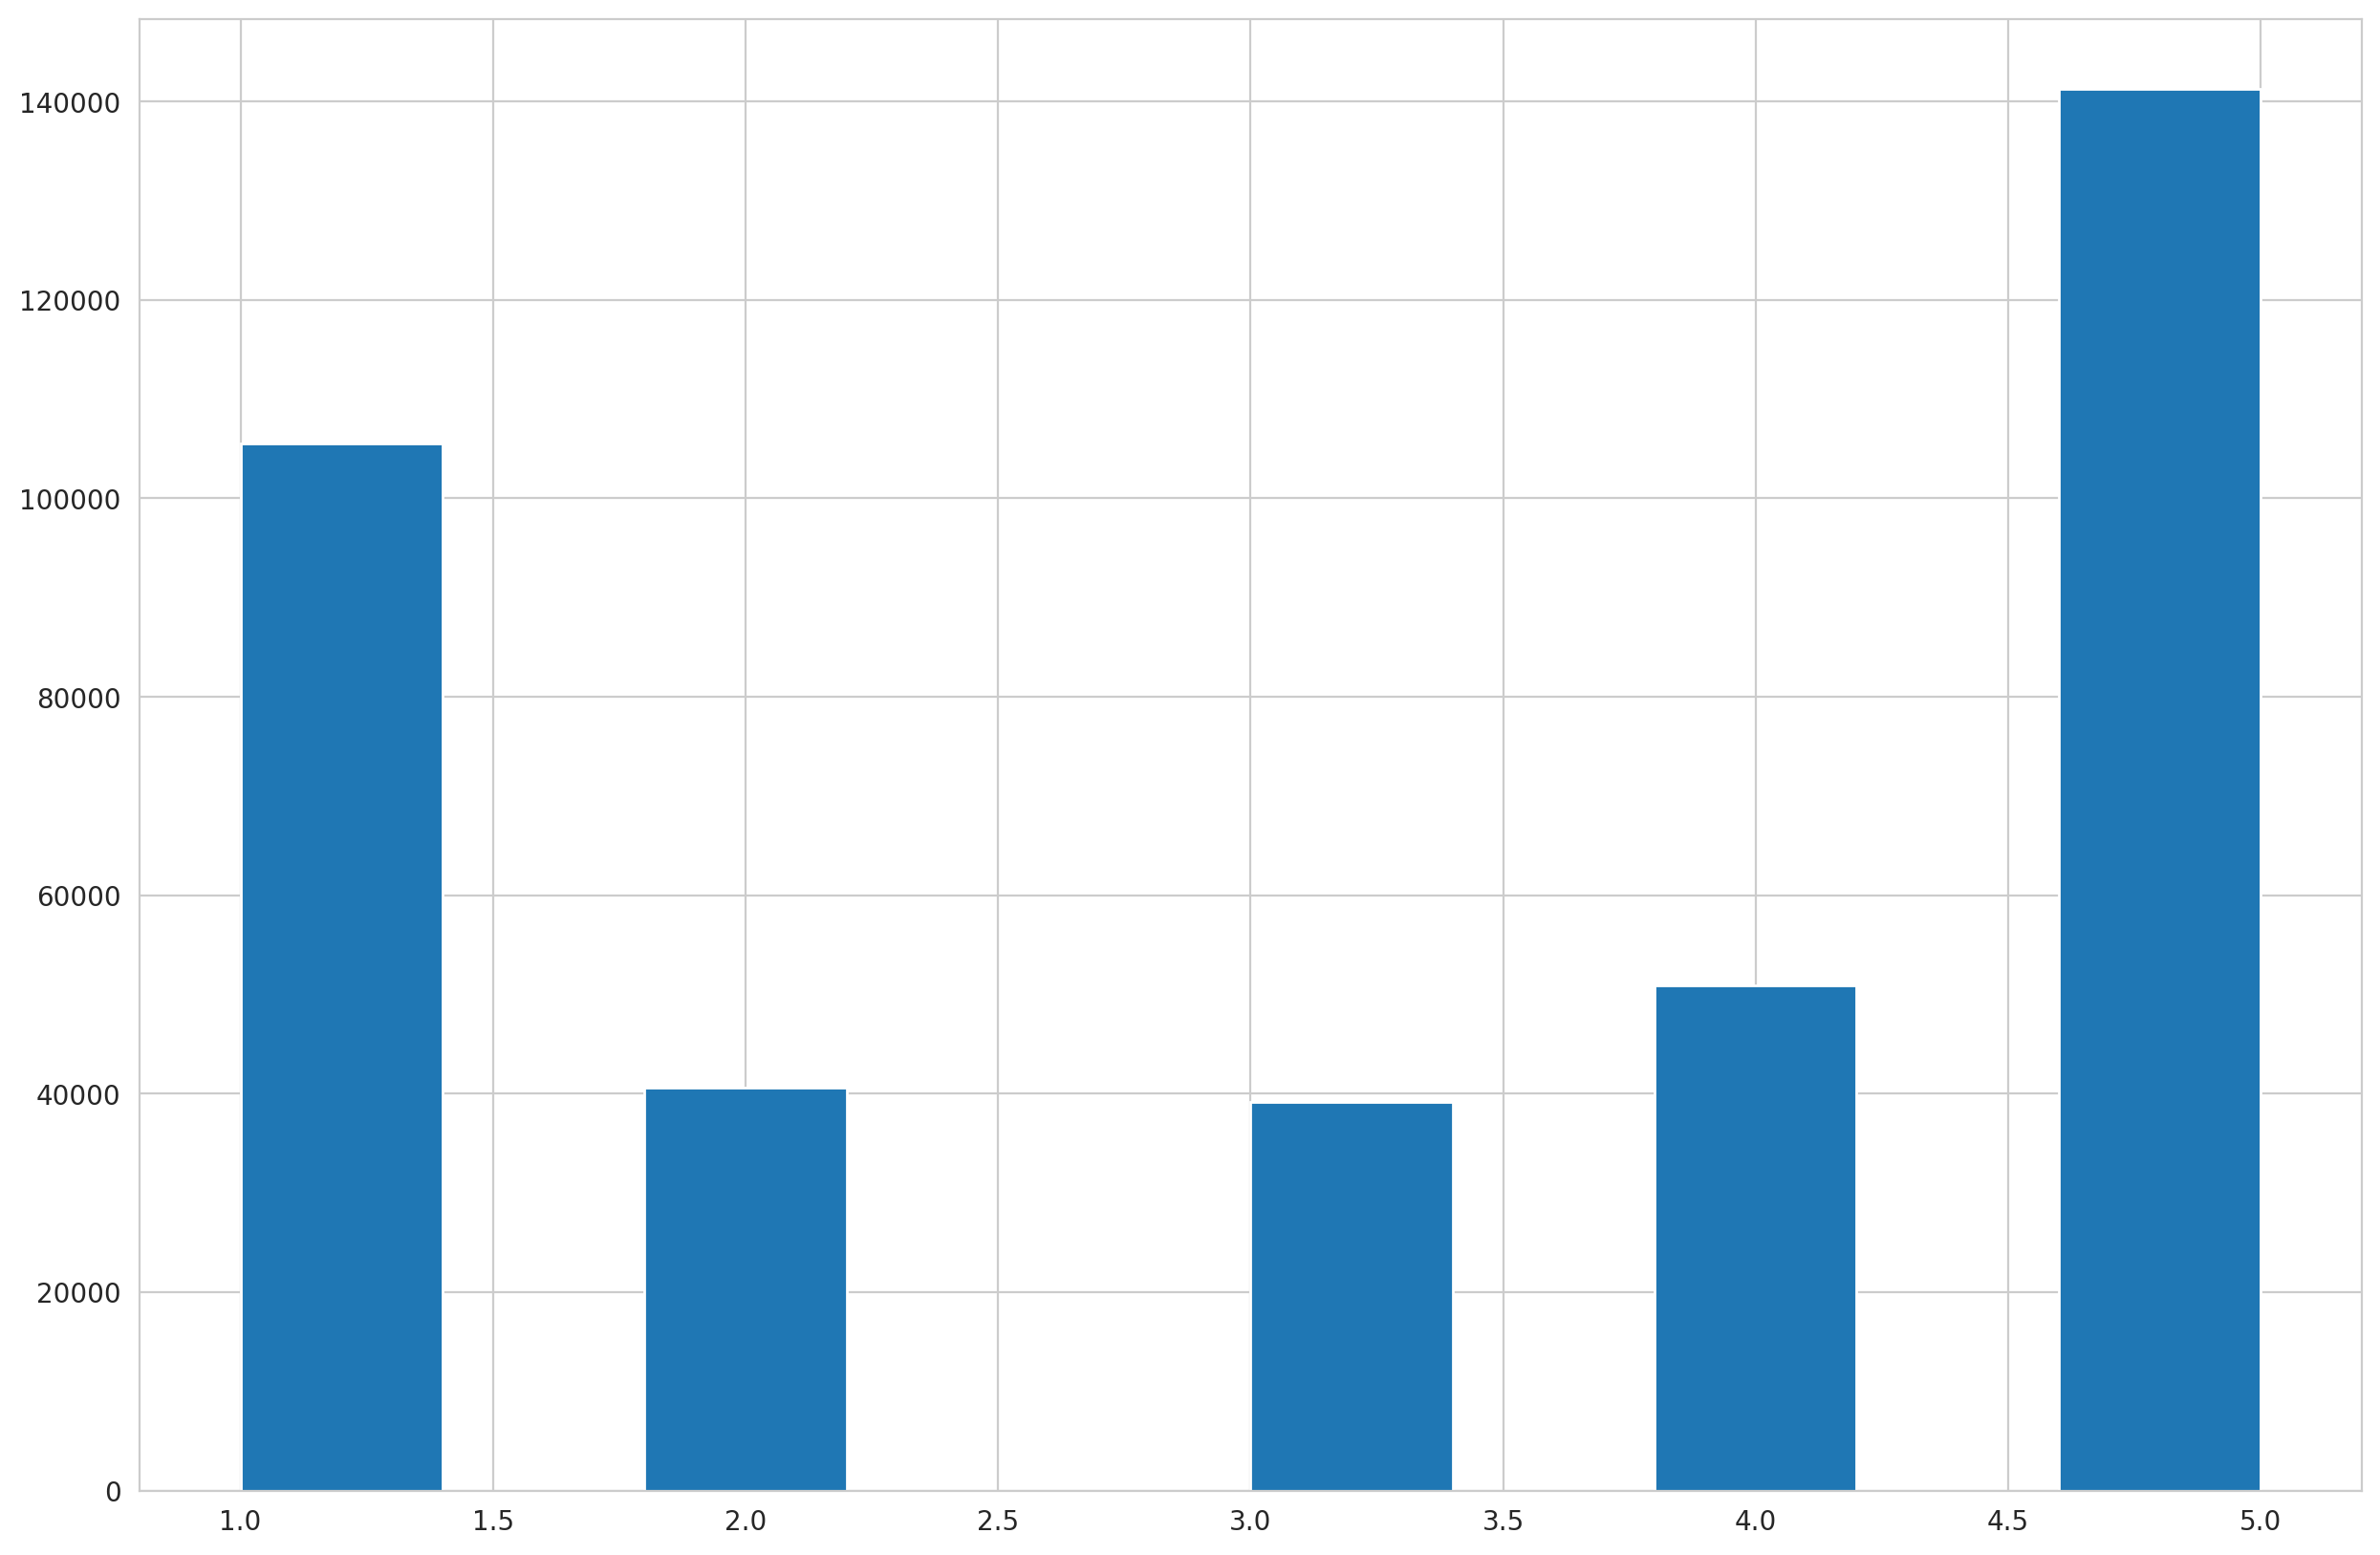

In [ ]:
plt.hist(df_fitrev['score'])
plt.show()

In [ ]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_fitrev['sentiment_polarity'] = df_fitrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_fitrev['sentiment_subjective'] = df_fitrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_fitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,"Love the app, but just recently I don't get a score for my stress management, I've tried clearing the cache, I've turned off my phone,I've stopped my fitbit & still no score",4,0.250000,0.425000
1,"Well, it finally happened to me. My charge 5 had random rapid battery drain, followed quickly by the black screen of death, and now it's not synching anymore. It never updated, but maybe it was a ...",1,-0.122222,0.522222
2,"My steps are keep resetting to the lower number. I reached 10,000 steps 4 times yesterday and 3 times today because it kept going back to 9000s. And I can't get help for this issue.",3,0.000000,0.000000
3,"The app is horrible recently. I use fitbit for years but the app had gone downhill. Constantly kicks me out. Doesn't matter how many times i reinstall, force quit or update my password. I think I ...",1,-0.256000,0.598667
4,"This is the worst app on my phone. Won't connect to Alexa. It logs me out constantly, requiring me to log back in every time I want to view my stats. While logged out, it doesn't track any of my d...",1,-0.340000,0.326667
...,...,...,...,...
377492,"Thanks, this is a must. Lost 11 lbs. so far in 2 weeks, thanks to Fitbit. Use this app and synch with My Fitness Pal and you will be unstoppable.",5,0.166667,0.466667
377493,With more Android devices than iOS out there it is great to see this. Keep up the great work. Just picked up my fitbit today because you released this app. :-),5,0.650000,0.750000
377494,Thank you for doing this.,5,0.000000,0.000000
377495,Glad to see it's here! Looks good.,5,0.662500,0.800000


## Lowercasing

In [ ]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_fitrev['content'] = df_fitrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_fitrev['content'][188])
print(df_fitrev['content'][1])
print(df_fitrev['content'][20100])

Awsome
Well, it finally happened to me. My charge 5 had random rapid battery drain, followed quickly by the black screen of death, and now it's not synching anymore. It never updated, but maybe it was a failed update. It lasted nearly 2 years. Even 50% off is overpriced.
Had nerve damage from the fitbit. Also been trying to get partial refund because my subscription lasted until October 2024 and keep getting run around on how to do it.


In [ ]:
#Lowercase all reviews to see the difference
df_fitrev['content']= df_fitrev['content'].apply(lambda x: x.lower())
print(df_fitrev['content'][188])
print(df_fitrev['content'][1])
print(df_fitrev['content'][20100])

awsome
well, it finally happened to me. my charge 5 had random rapid battery drain, followed quickly by the black screen of death, and now it's not synching anymore. it never updated, but maybe it was a failed update. it lasted nearly 2 years. even 50% off is overpriced.
had nerve damage from the fitbit. also been trying to get partial refund because my subscription lasted until october 2024 and keep getting run around on how to do it.


##Stopwords Removal
Indonesian Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_fitrev['wordCount'] = [len(review.split()) for review in df_fitrev['content']]
df_fitrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_fitrev['content']]
df_fitrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_fitrev['content']]

In [ ]:
df_fitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,"love the app, but just recently i don't get a score for my stress management, i've tried clearing the cache, i've turned off my phone,i've stopped my fitbit & still no score",4,0.250000,0.425000,32,0,9
1,"well, it finally happened to me. my charge 5 had random rapid battery drain, followed quickly by the black screen of death, and now it's not synching anymore. it never updated, but maybe it was a ...",1,-0.122222,0.522222,48,0,11
2,"my steps are keep resetting to the lower number. i reached 10,000 steps 4 times yesterday and 3 times today because it kept going back to 9000s. and i can't get help for this issue.",3,0.000000,0.000000,35,0,5
3,"the app is horrible recently. i use fitbit for years but the app had gone downhill. constantly kicks me out. doesn't matter how many times i reinstall, force quit or update my password. i think i ...",1,-0.256000,0.598667,48,0,10
4,"this is the worst app on my phone. won't connect to alexa. it logs me out constantly, requiring me to log back in every time i want to view my stats. while logged out, it doesn't track any of my d...",1,-0.340000,0.326667,57,0,11
...,...,...,...,...,...,...,...
377492,"thanks, this is a must. lost 11 lbs. so far in 2 weeks, thanks to fitbit. use this app and synch with my fitness pal and you will be unstoppable.",5,0.166667,0.466667,30,0,6
377493,with more android devices than ios out there it is great to see this. keep up the great work. just picked up my fitbit today because you released this app. :-),5,0.650000,0.750000,31,0,6
377494,thank you for doing this.,5,0.000000,0.000000,5,0,1
377495,glad to see it's here! looks good.,5,0.662500,0.800000,7,0,3


In [ ]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_fitrev['sentiment_rating'] = df_fitrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df_fitrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"love the app, but just recently i don't get a score for my stress management, i've tried clearing the cache, i've turned off my phone,i've stopped my fitbit & still no score",4,0.250000,0.425000,Positive
1,"well, it finally happened to me. my charge 5 had random rapid battery drain, followed quickly by the black screen of death, and now it's not synching anymore. it never updated, but maybe it was a ...",1,-0.122222,0.522222,Negative
2,"my steps are keep resetting to the lower number. i reached 10,000 steps 4 times yesterday and 3 times today because it kept going back to 9000s. and i can't get help for this issue.",3,0.000000,0.000000,Neutral
3,"the app is horrible recently. i use fitbit for years but the app had gone downhill. constantly kicks me out. doesn't matter how many times i reinstall, force quit or update my password. i think i ...",1,-0.256000,0.598667,Negative
4,"this is the worst app on my phone. won't connect to alexa. it logs me out constantly, requiring me to log back in every time i want to view my stats. while logged out, it doesn't track any of my d...",1,-0.340000,0.326667,Negative
...,...,...,...,...,...
377492,"thanks, this is a must. lost 11 lbs. so far in 2 weeks, thanks to fitbit. use this app and synch with my fitness pal and you will be unstoppable.",5,0.166667,0.466667,Positive
377493,with more android devices than ios out there it is great to see this. keep up the great work. just picked up my fitbit today because you released this app. :-),5,0.650000,0.750000,Positive
377494,thank you for doing this.,5,0.000000,0.000000,Positive
377495,glad to see it's here! looks good.,5,0.662500,0.800000,Positive


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


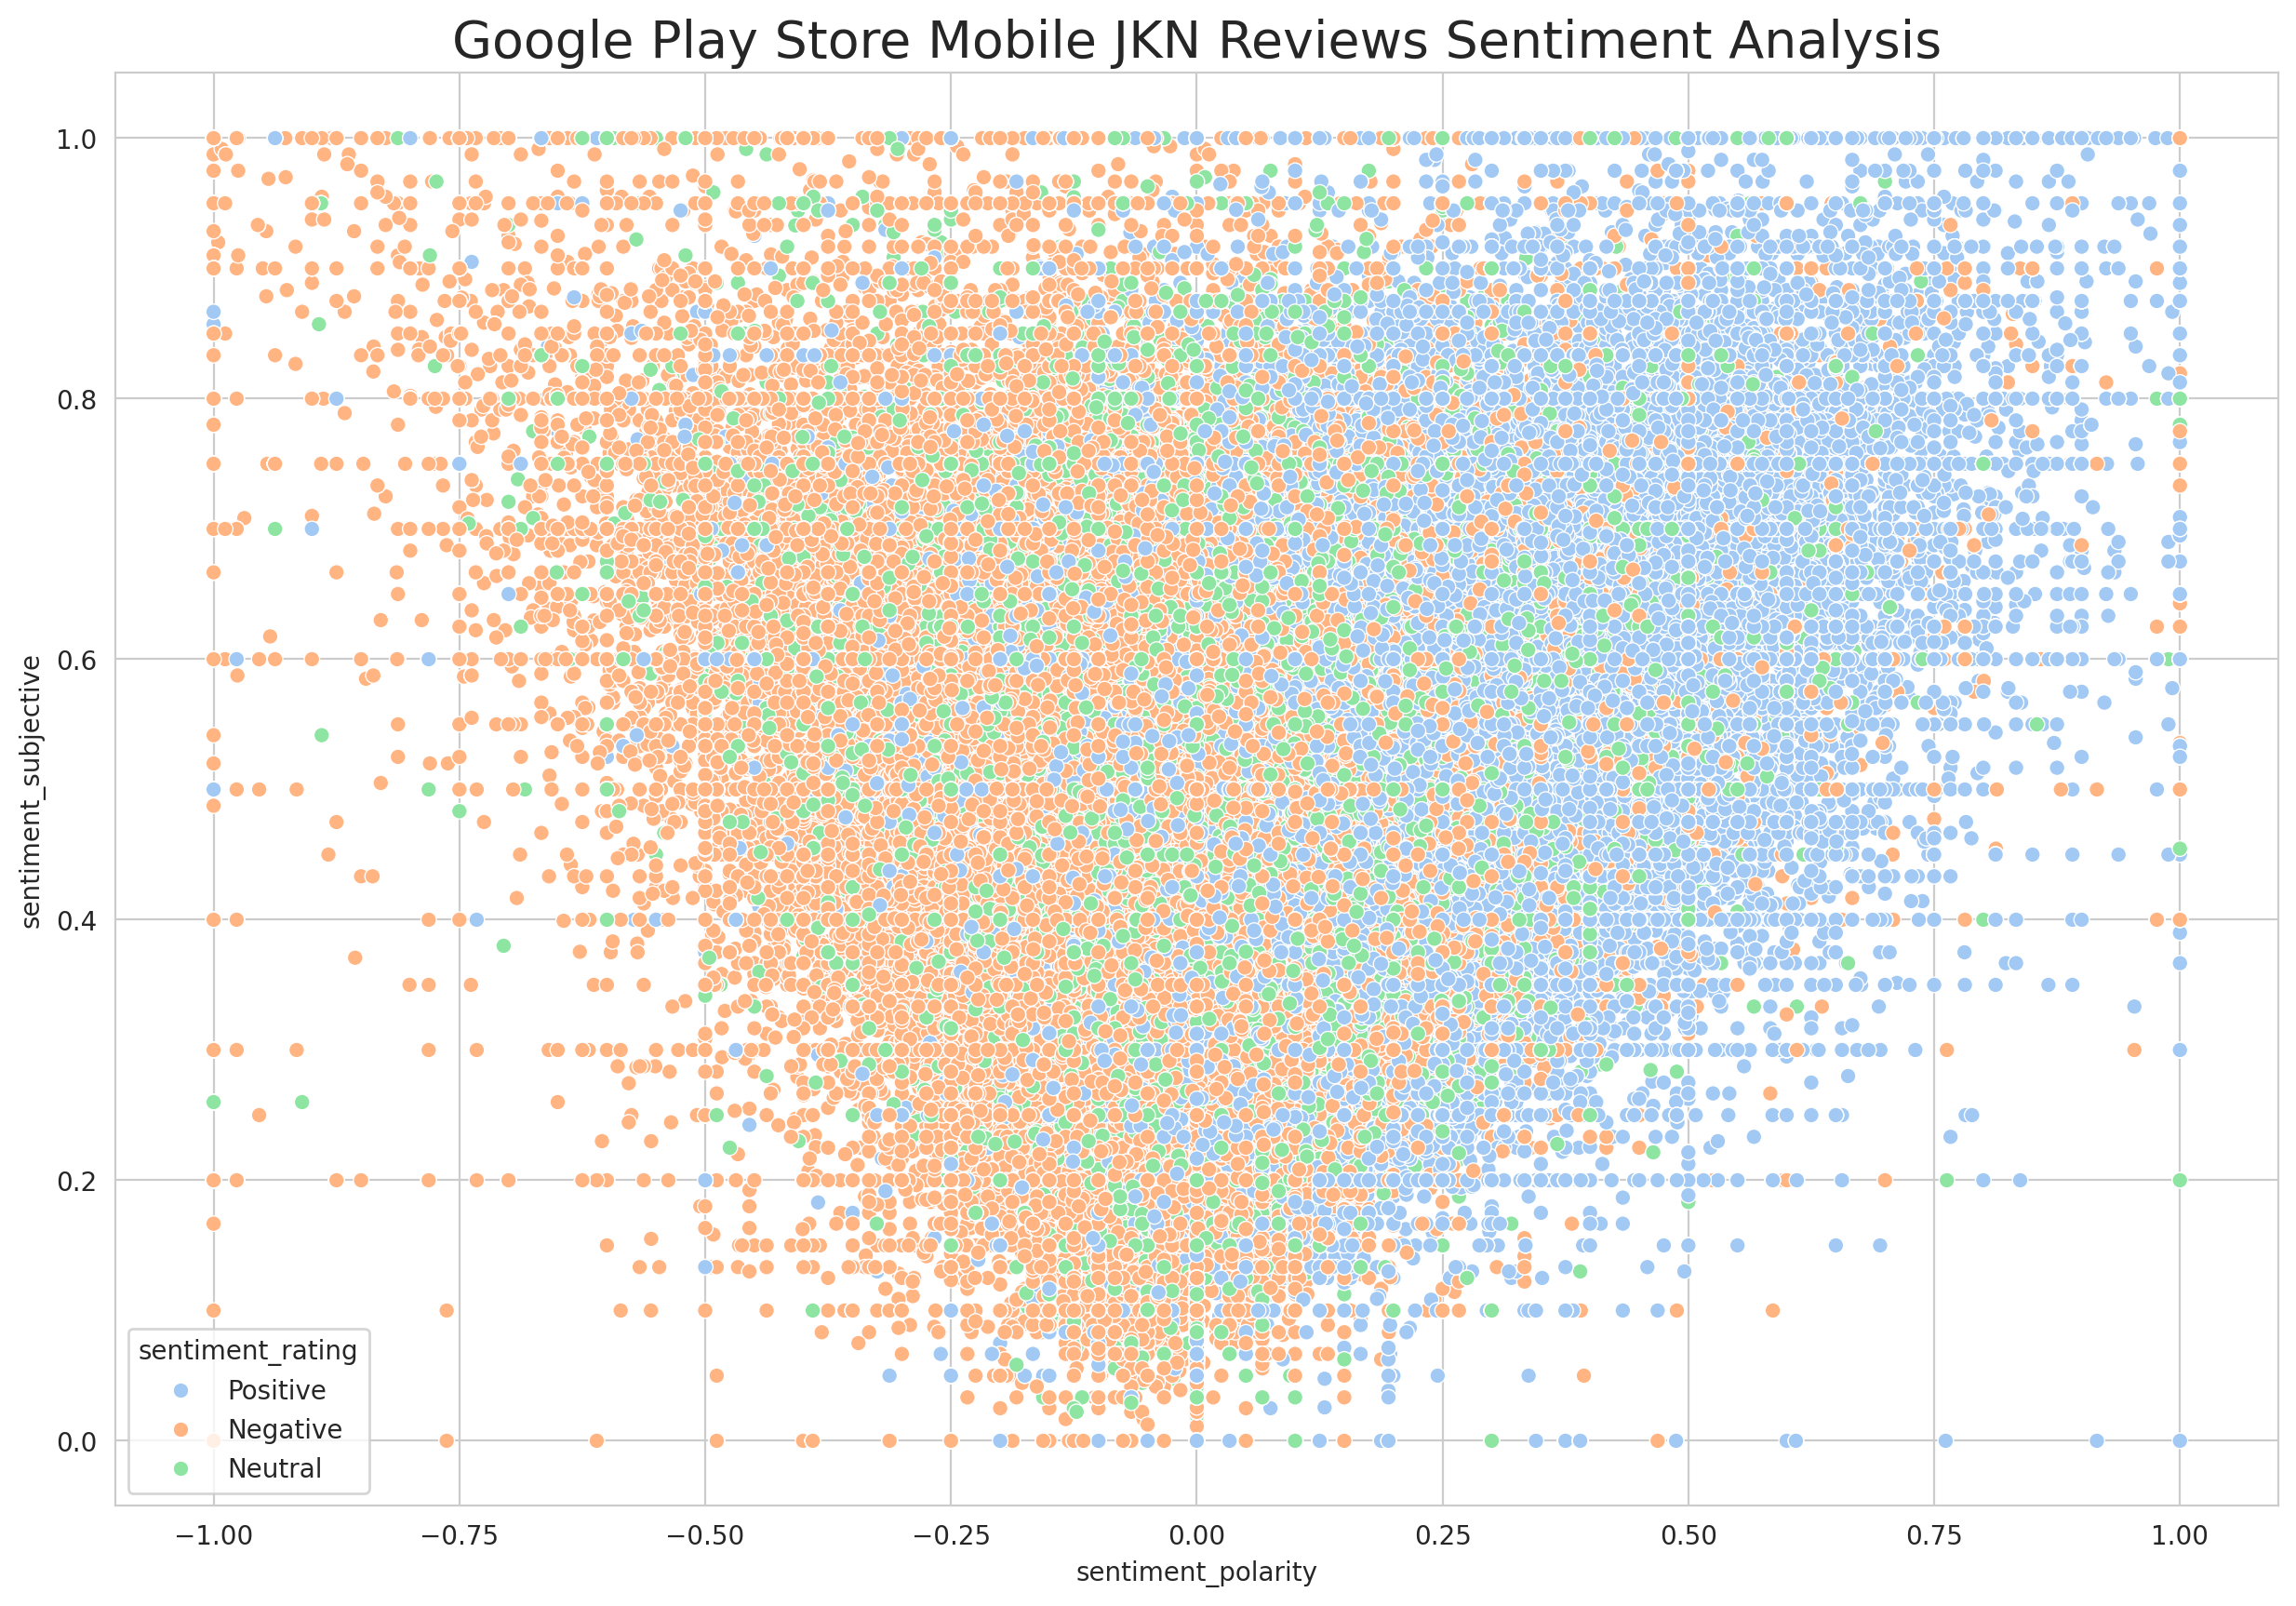

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_fitrev['sentiment_polarity'], y=df_fitrev['sentiment_subjective'],
                hue=df_fitrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Mobile JKN Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-26-6f9223a4813b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


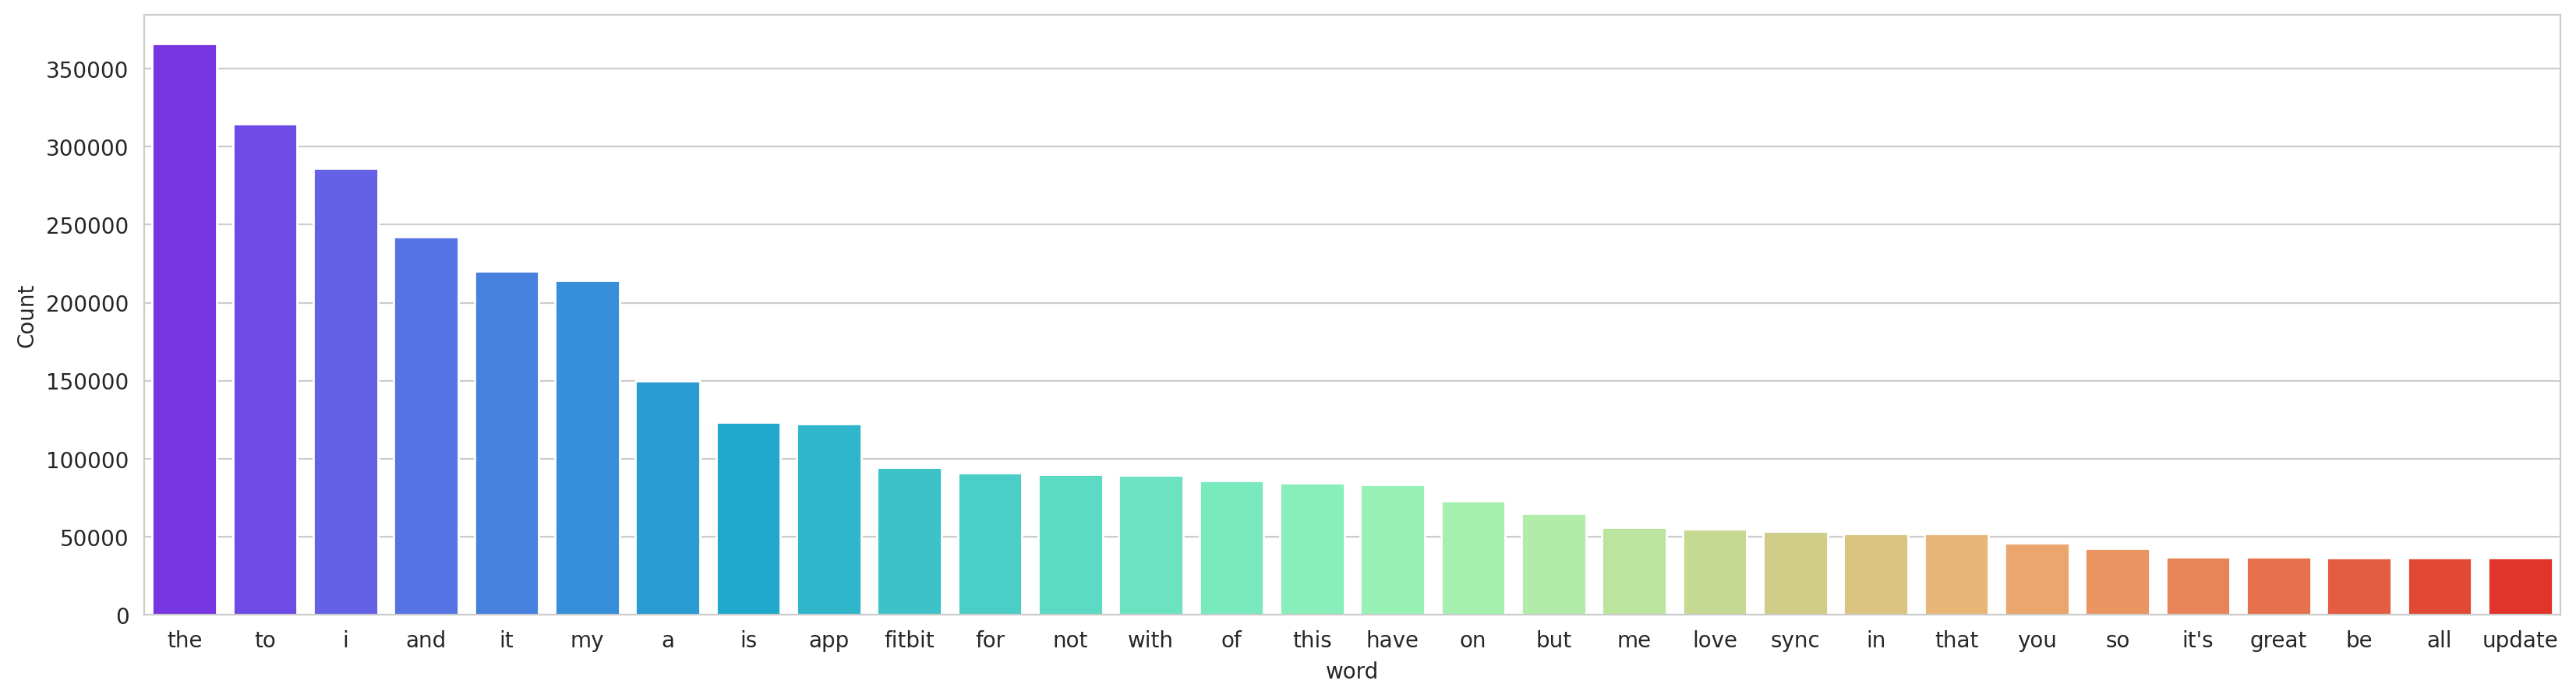

In [ ]:
freq_words(df_fitrev['content'])

In [ ]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_jknrev['content'] = df_jknrev['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_jknrev is your DataFrame and 'content' is the column
df_jknrev['content'] = df_jknrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_jknrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"daftar pakai otp, otp nya udh dicoba pulahan kali beberapa nomer gak masuk",1,0.0,0.0,Negative
1,"bagua aplikasinya, semoga ditingkatkan pelayanannya, rumah sakit puskesmas faskes mudah mendapatkan dana bpjs melayani masyarakat",5,0.0,0.0,Positive
2,"waktu estimasi menunggu bodoh banget ampe 3 jam, baru 30 menit nomor antrian gw skip, gak didahuluin. nunggu awal",1,0.0,0.0,Negative
3,"setipa verifikasi otp gagal terus, alasannya koneksi offline, padahal internet kenceng. di perbaiki, mau pindah faskes jadi ga bisa. makasih",1,0.0,0.0,Negative
4,"mau bikin akun susah bangett, kode otp nomer handphone ngga dapet mulu😤",2,0.0,0.0,Negative
...,...,...,...,...,...
26683,semoga bulan penuh rahmah amal ibadah diterima allah swt. bagi developer pihak2 yg membantu proses pengembangan aplikasi mendapatkan pahala. amiiin,5,0.0,0.0,Positive
26684,nice,5,0.6,1.0,Positive
26685,sip mantapsssss....,5,0.0,0.0,Positive
26686,sangat informatif dapat membantu masyarakat.,5,0.0,0.0,Positive


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

<ipython-input-56-4d03cb5e9bb2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


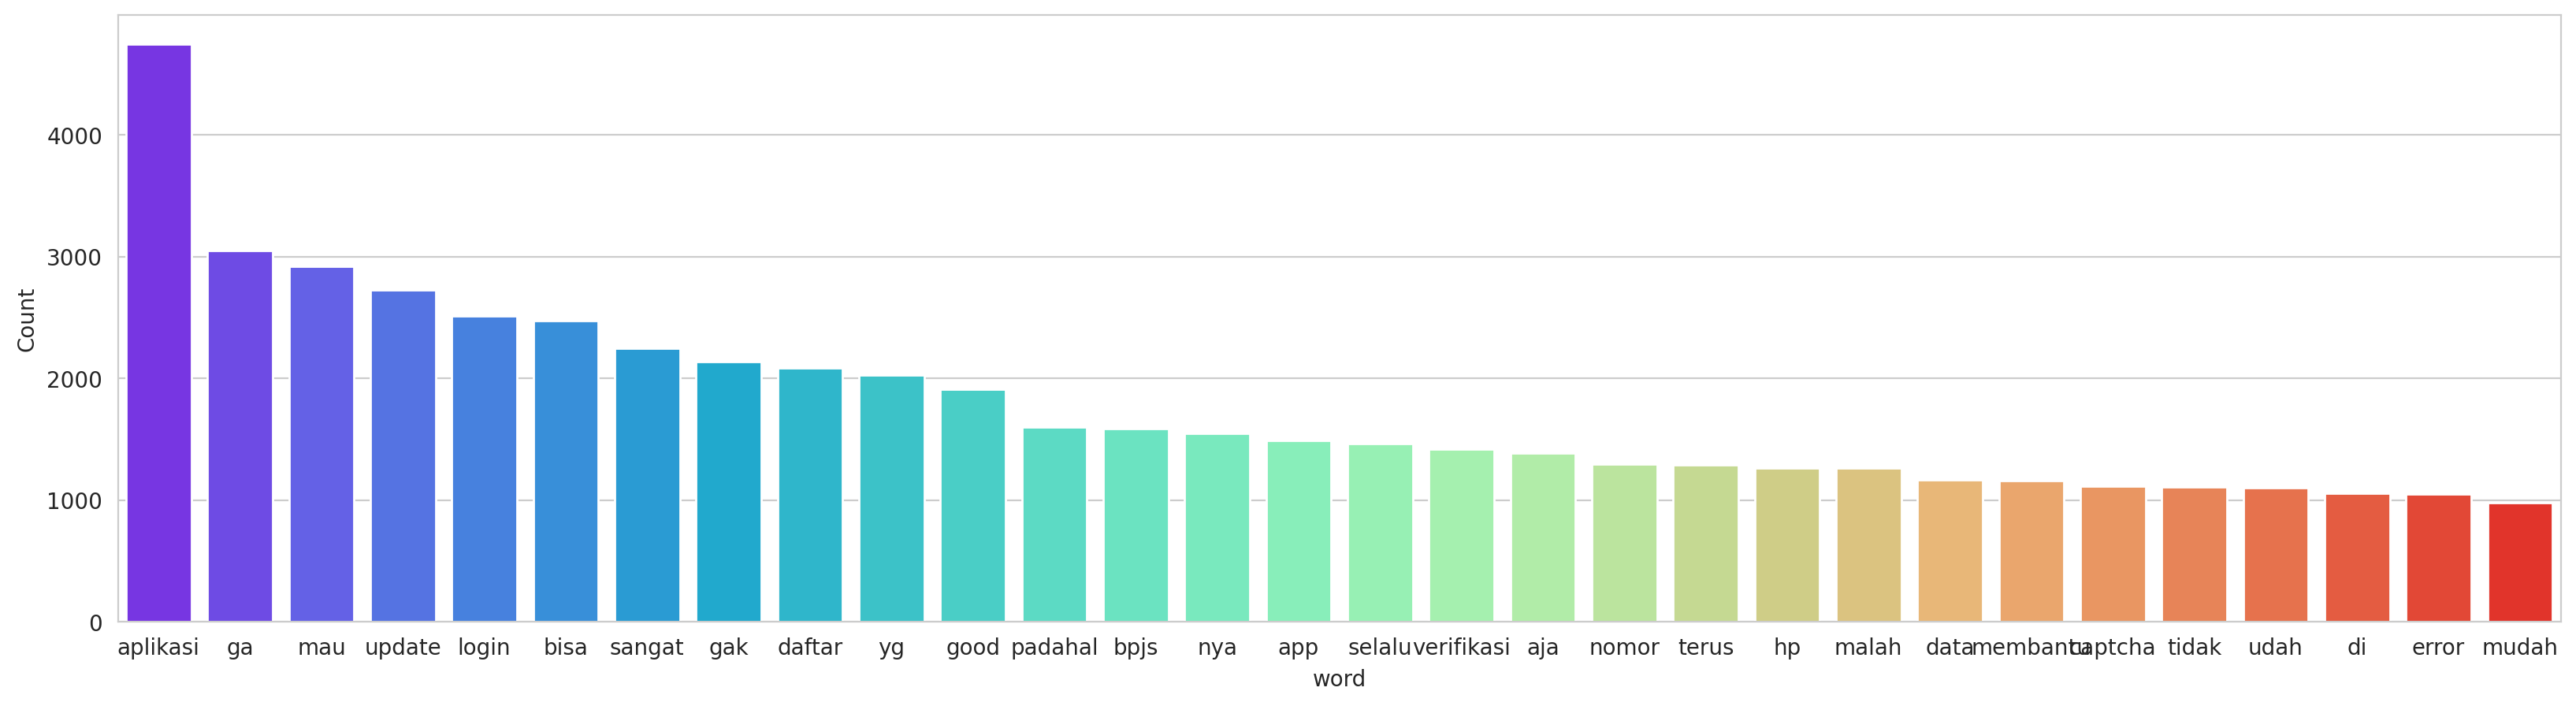

In [ ]:
freq_words(df_jknrev['content'])

In [ ]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_jknrev_stopwords['wordCount'] = [len(review.split()) for review in df_jknrev_stopwords['content']]
df_jknrev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_jknrev_stopwords['review_after_stopwords']]


NameError: name 'df_nhsrev_stopwords' is not defined

## Homework TUGAS 1A

NLP Pipeline:
Tokenization
Lowering
Stopword Removal
Lemmatization
Stemming
Punctuations Removal
Expand Contractions
Spelling Correction
Rare Words Removal
Common Words Removal
